In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

d = dataset
f = imputed dataset
p = diabetes positive
n = diabetes negative

In [2]:
d=pd.read_csv('health care diabetes.csv')

In [3]:
d.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.shape

(768, 9)

EDA and filling missing values

In [5]:
d.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#Zero Values

In [6]:
print(d[d['Glucose']==0].shape)
f'{(5/765)*100}% of data is missing Glucose values'

(5, 9)


'0.6535947712418301% of data is missing Glucose values'

In [7]:
print(d[d['BloodPressure']==0].shape)
f'{(35/765)*100}% of data is missing BloodPressure values'

(35, 9)


'4.57516339869281% of data is missing BloodPressure values'

In [8]:
print(d[d['SkinThickness']==0].shape)
f'{(227/765)*100}% of data is missing SkinThickness values'

(227, 9)


'29.673202614379086% of data is missing SkinThickness values'

In [9]:
print(d[d['Insulin']==0].shape)
f'{(374/765)*100}% of data is missing Insulin values'

(374, 9)


'48.888888888888886% of data is missing Insulin values'

In [10]:
print(d[d['BMI']==0].shape)
f'{(11/765)*100}% of data is missing BMI values'

(11, 9)


'1.4379084967320261% of data is missing BMI values'

#Replacing zeros in 

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

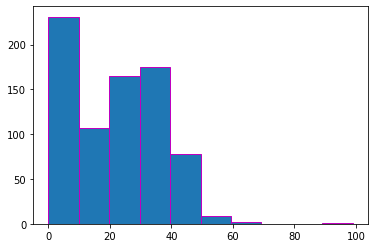

In [11]:
plt.hist(d['SkinThickness'],edgecolor='m')

In [12]:
d[d['SkinThickness']!=0]['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

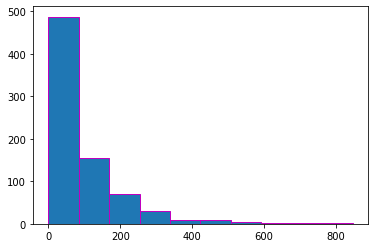

In [13]:
plt.hist(d['Insulin'],edgecolor='m')

In [14]:
d[d['Insulin']!=0]['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

#Replacing zeros in skinthickness and insulin

In [15]:
from numpy import nan
f=d
f[['SkinThickness','Insulin']]=f[['SkinThickness','Insulin']].replace(0,nan)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

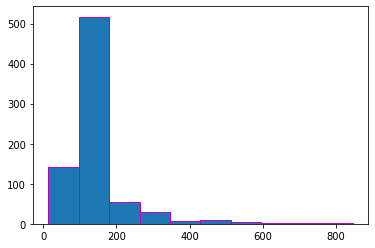

In [16]:
f.fillna(f.mean(),inplace=True)
plt.hist(f['Insulin'],edgecolor='m')

In [17]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
f.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [20]:
p = f[f['Outcome']==1]
p.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1


In [21]:
n = f[f['Outcome']==0]
n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
10,4,110,92,29.15342,155.548223,37.6,0.191,30,0


99     17
100    17
111    14
129    14
125    14
Name: Glucose, dtype: int64


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

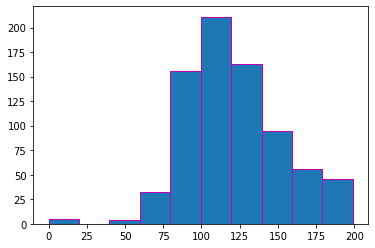

In [22]:
print(f['Glucose'].value_counts().head())
plt.hist(f['Glucose'],edgecolor='m')

70    57
74    52
78    45
68    45
72    44
Name: BloodPressure, dtype: int64


(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

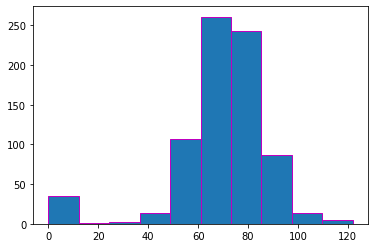

In [23]:
print(f['BloodPressure'].value_counts().head())
plt.hist(f['BloodPressure'],edgecolor='m')

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
Name: SkinThickness, dtype: int64


(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

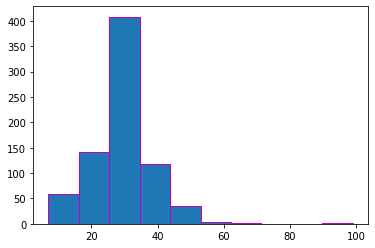

In [24]:
print(f['SkinThickness'].value_counts().head())
plt.hist(f['SkinThickness'],edgecolor='m')

155.548223    374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
Name: Insulin, dtype: int64


(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

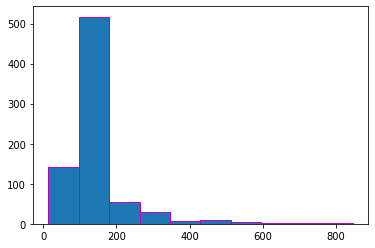

In [25]:
print(f['Insulin'].value_counts().head())
plt.hist(f['Insulin'],edgecolor='m')

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
Name: BMI, dtype: int64


(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

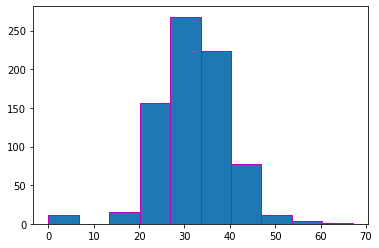

In [26]:
print(f['BMI'].value_counts().head())
plt.hist(f['BMI'],edgecolor='m')

In [27]:
f.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


Correlation Analysis

In [28]:
p.shape

(268, 9)

In [29]:
n.shape

(500, 9)

32.9    8
31.6    7
33.3    6
31.2    5
30.5    5
Name: BMI, dtype: int64


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x1c9f38ee7a0>])

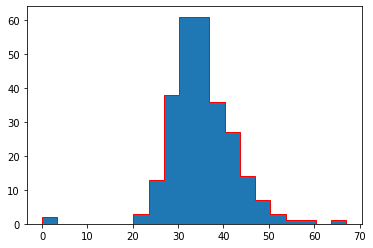

In [30]:
print(p['BMI'].value_counts().head())
plt.hist(p['BMI'],histtype='stepfilled',bins=20,edgecolor='r')

125    7
128    6
129    6
115    6
158    6
Name: Glucose, dtype: int64


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x1c9f395a350>])

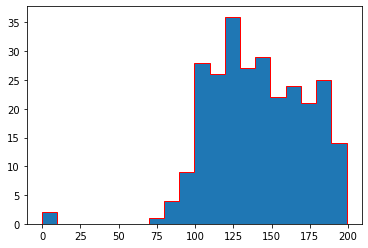

In [31]:
print(p['Glucose'].value_counts().head())
plt.hist(p['Glucose'],histtype='stepfilled',bins=20,edgecolor='r')

70    23
76    18
78    17
74    17
72    16
Name: BloodPressure, dtype: int64


(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x1c9f39caa70>])

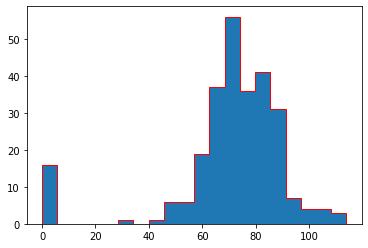

In [32]:
print(p['BloodPressure'].value_counts().head())
plt.hist(p['BloodPressure'],histtype='stepfilled',bins=20,edgecolor='r')

29.15342    88
32.00000    14
30.00000     9
33.00000     9
39.00000     8
Name: SkinThickness, dtype: int64


(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 [<matplotlib.patches.Polygon at 0x1c9f3a39750>])

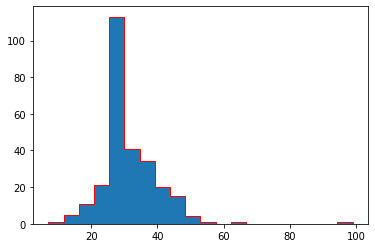

In [33]:
print(p['SkinThickness'].value_counts().head())
plt.hist(p['SkinThickness'],histtype='stepfilled',bins=20,edgecolor='r')

155.548223    138
130.000000      6
180.000000      4
175.000000      3
156.000000      3
Name: Insulin, dtype: int64


(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 [<matplotlib.patches.Polygon at 0x1c9f3a73ca0>])

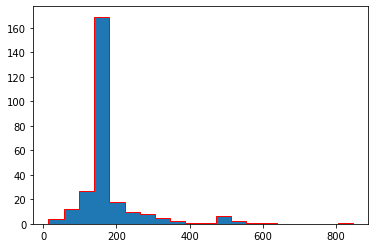

In [34]:
print(p['Insulin'].value_counts().head())
plt.hist(p['Insulin'],histtype='stepfilled',bins=20,edgecolor='r')

#Scatter plots

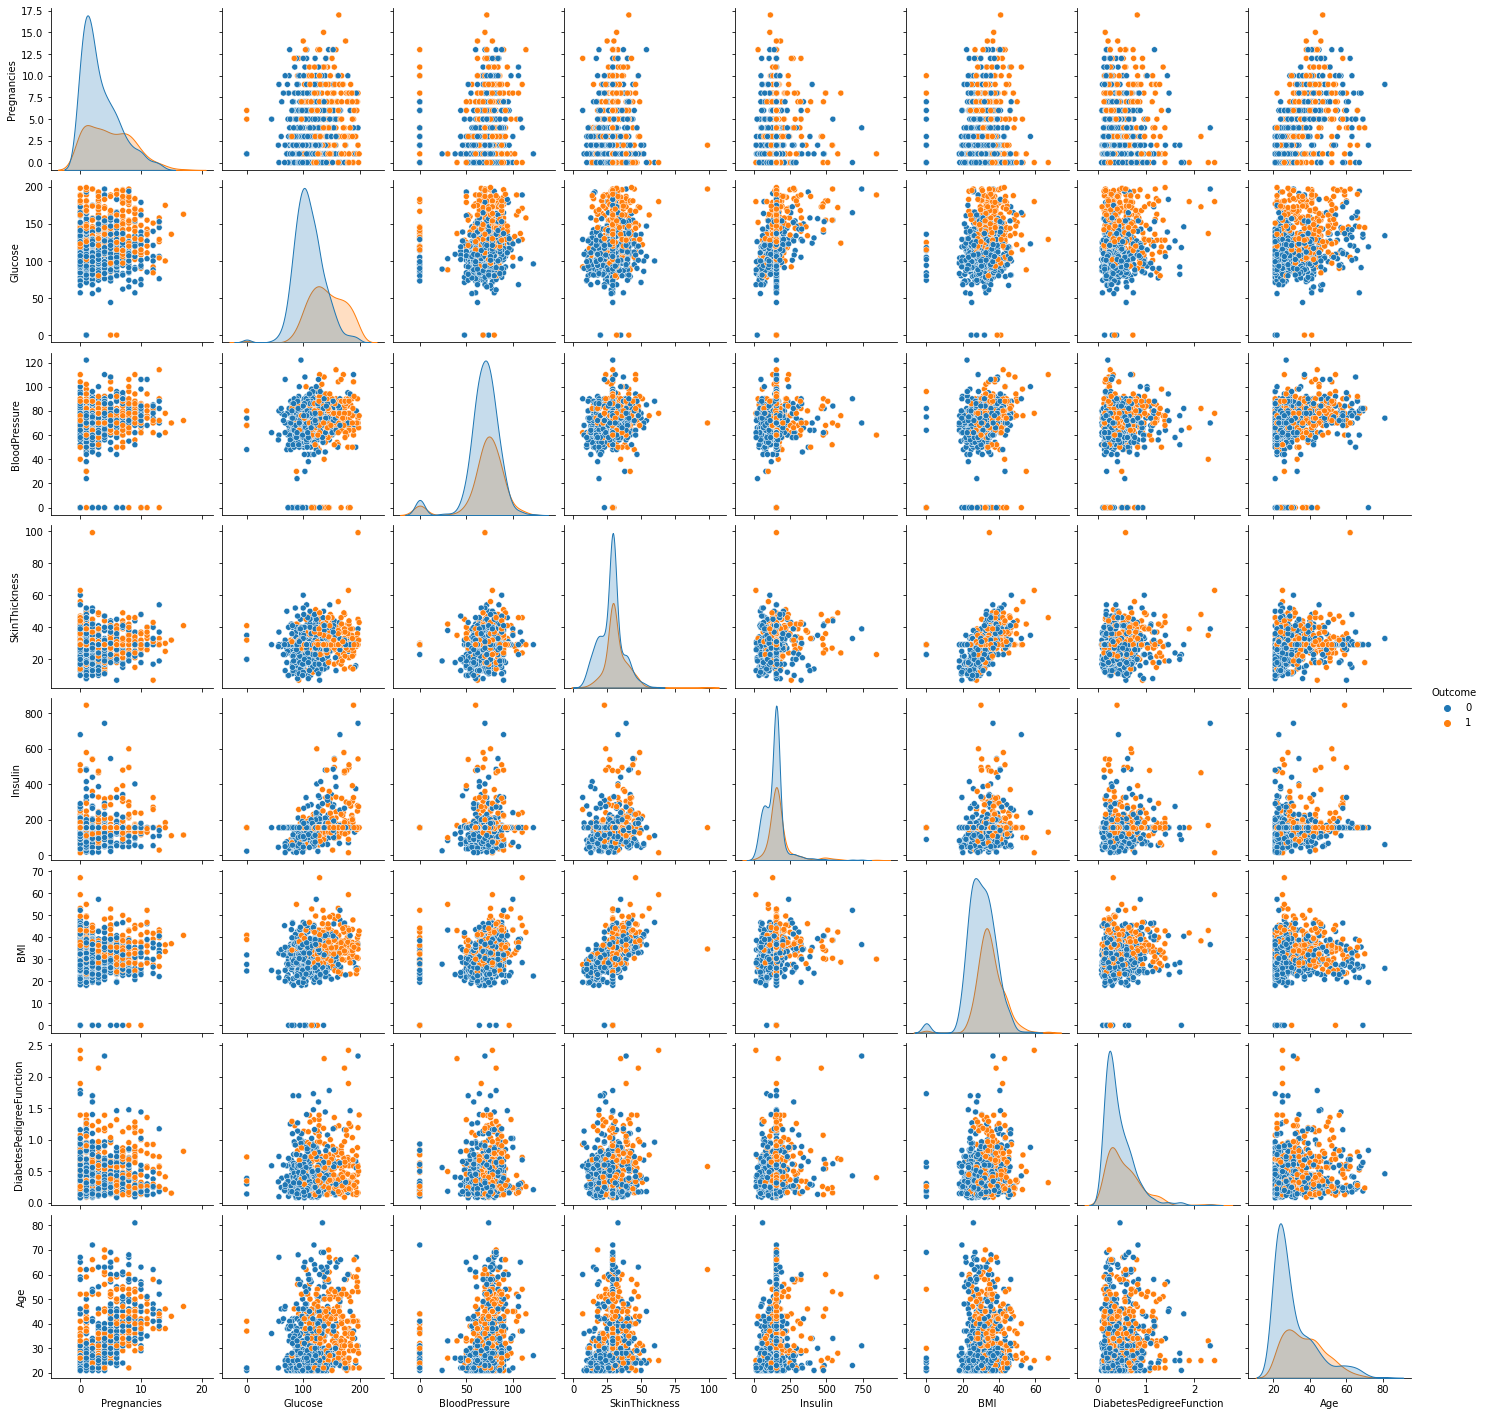

In [35]:
g=sns.pairplot(f,hue='Outcome')

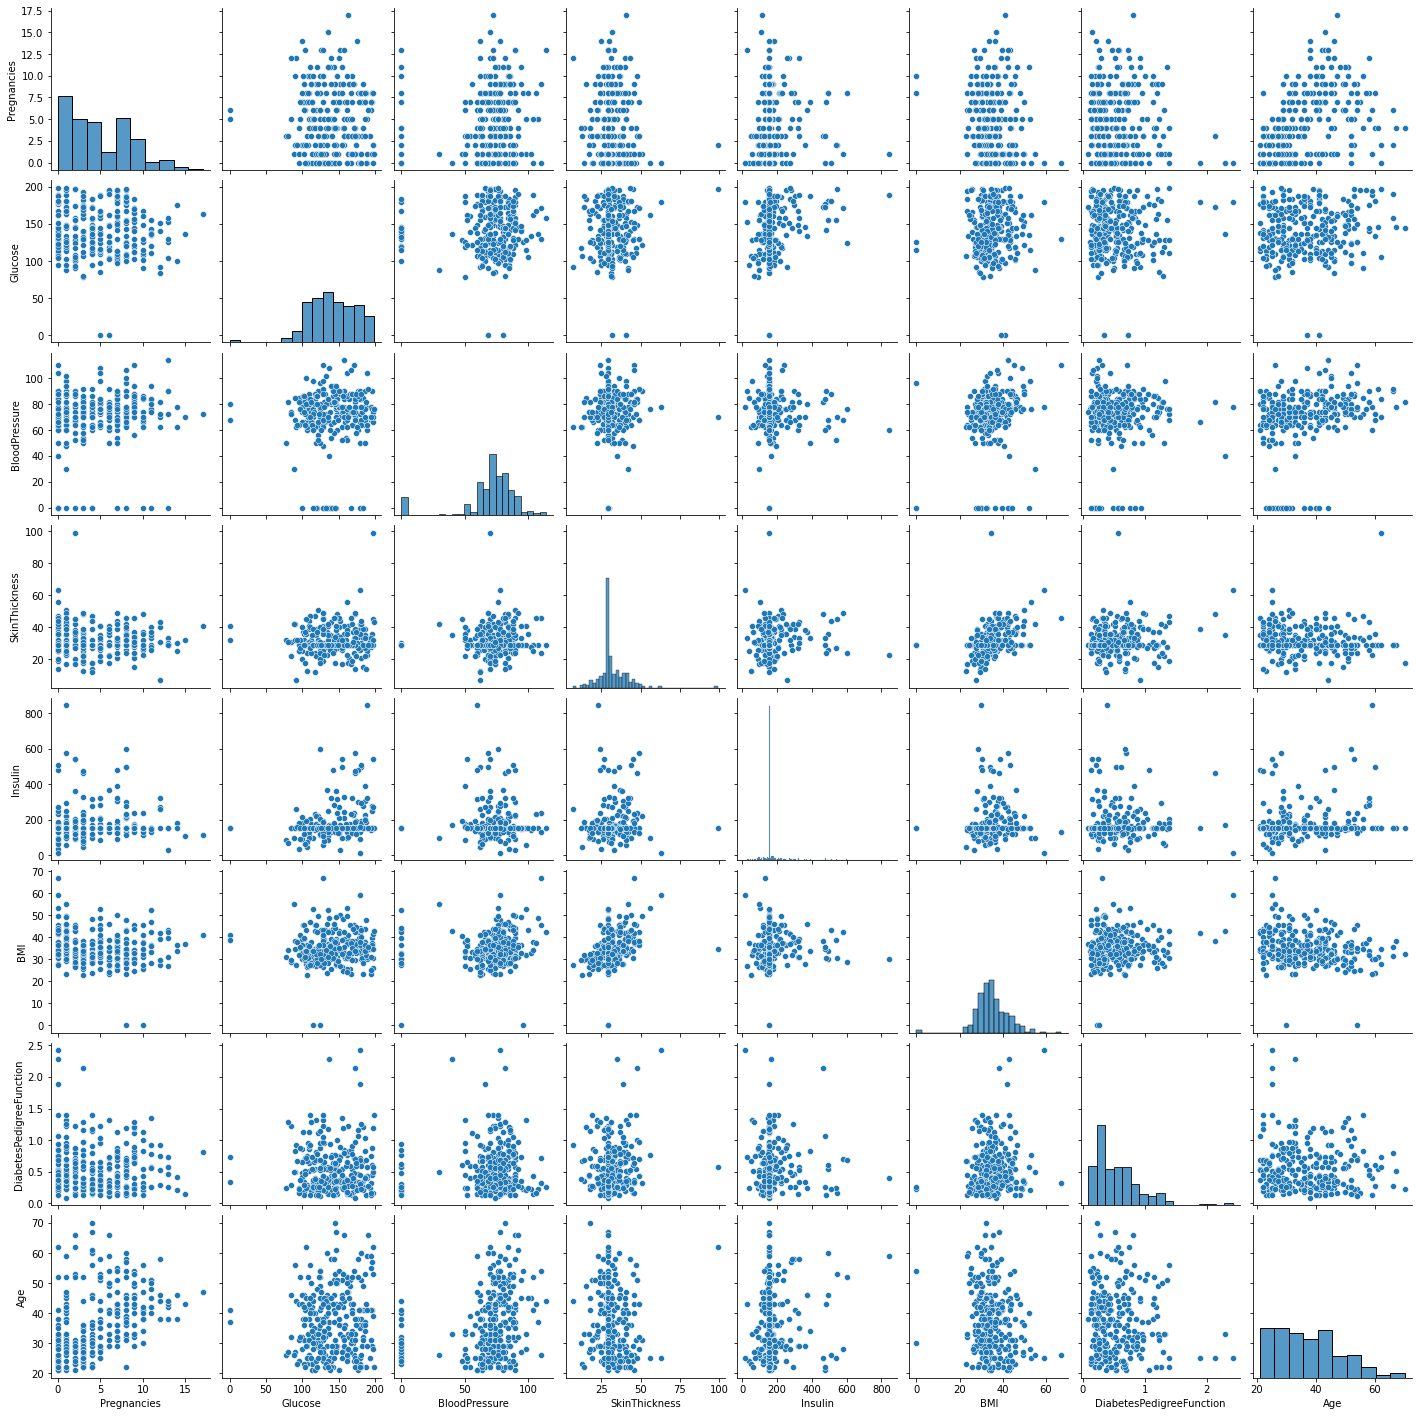

In [36]:
g=sns.pairplot(p[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                  'BMI','DiabetesPedigreeFunction', 'Age']])

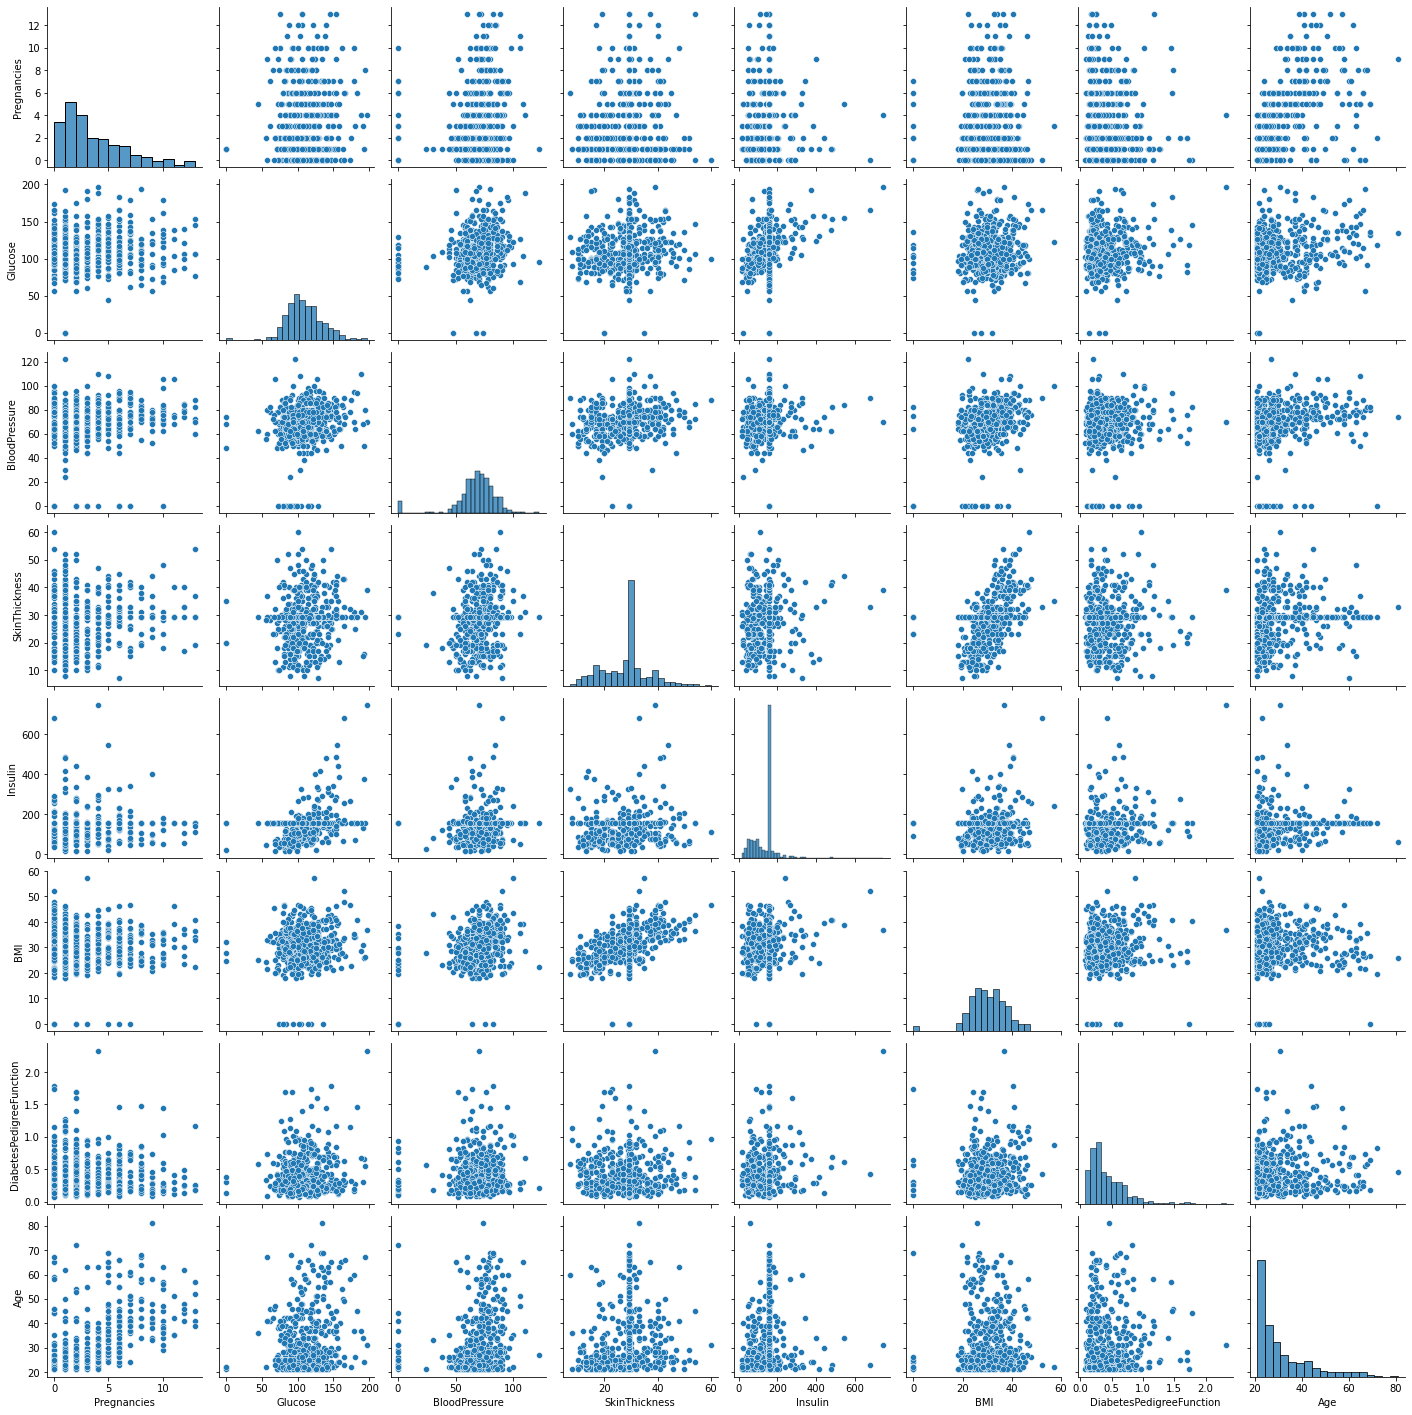

In [37]:
g=sns.pairplot(n[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                  'BMI','DiabetesPedigreeFunction', 'Age']])

In [38]:
f.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.123444,0.045319,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.182455,0.123444,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.045319,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.281805,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

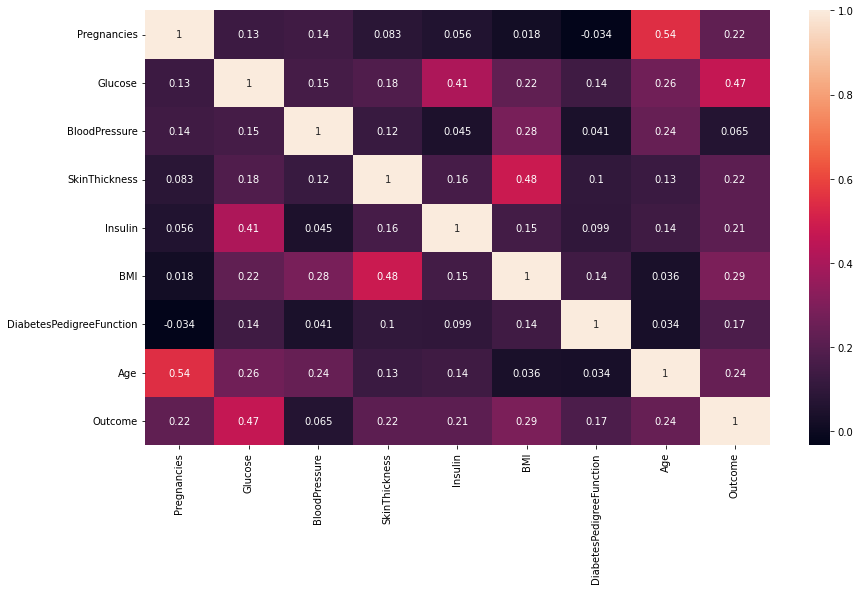

In [39]:
plt.figure(figsize=(14,8))
sns.heatmap(f.corr(),annot=True)

Correlations:
- Pregnancies_Age_+
- Glucose_Outcome_Insulin_+
- SkinThickness_BMI_+

Data Modelling and Model Preformance

1 : Logistic Regression

In [ ]:
f.head()

In [41]:
u=f.iloc[:,[0,1,2,3,4,5,6,7]].values
l=f.iloc[:,8].values

In [44]:
from sklearn.model_selection import train_test_split
a,d,s,f = train_test_split(u,l,test_size=0.2,random_state=10)

In [45]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(a,s)

LogisticRegression()

In [46]:
print(lm.score(a,s))
print(lm.score(d,f))

0.7719869706840391
0.7597402597402597


In [47]:
g=lm.predict(d)

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(f,g)
cm

array([[86,  9],
       [28, 31]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
cr=classification_report(f,g)
cr

'              precision    recall  f1-score   support\n\n           0       0.75      0.91      0.82        95\n           1       0.78      0.53      0.63        59\n\n    accuracy                           0.76       154\n   macro avg       0.76      0.72      0.72       154\nweighted avg       0.76      0.76      0.75       154\n'

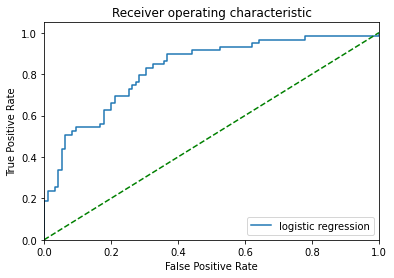

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lra = roc_auc_score(f,g)
fpr,tpr,t = roc_curve(f,lm.predict_proba(d)[:,1])

plt.plot(fpr,tpr,label='logistic regression'%lra)
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

2 : Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

for i in range(3,20):
    print('for max_depth = ',i)
    dtm = DecisionTreeClassifier(max_depth=i)
    dtm.fit(a,s)
    g = dtm.predict(d)
    print('Accuracy : ',metrics.accuracy_score(f,g))

for max_depth =  3
Accuracy :  0.6948051948051948
for max_depth =  4
Accuracy :  0.7402597402597403
for max_depth =  5
Accuracy :  0.7532467532467533
for max_depth =  6
Accuracy :  0.7597402597402597
for max_depth =  7
Accuracy :  0.7532467532467533
for max_depth =  8
Accuracy :  0.7337662337662337
for max_depth =  9
Accuracy :  0.7402597402597403
for max_depth =  10
Accuracy :  0.7727272727272727
for max_depth =  11
Accuracy :  0.7467532467532467
for max_depth =  12
Accuracy :  0.7077922077922078
for max_depth =  13
Accuracy :  0.7142857142857143
for max_depth =  14
Accuracy :  0.7077922077922078
for max_depth =  15
Accuracy :  0.7142857142857143
for max_depth =  16
Accuracy :  0.7077922077922078
for max_depth =  17
Accuracy :  0.7207792207792207
for max_depth =  18
Accuracy :  0.7012987012987013
for max_depth =  19
Accuracy :  0.7207792207792207


In [71]:
dtm = DecisionTreeClassifier(max_depth=10)
dtm.fit(a,s)
g = dtm.predict(d)

In [72]:
print(dtm.score(a,s))
print(dtm.score(d,f))

0.9267100977198697
0.7597402597402597


In [73]:
confusion_matrix(f,g)

array([[79, 16],
       [21, 38]], dtype=int64)

In [74]:
classification_report(f,g)

'              precision    recall  f1-score   support\n\n           0       0.79      0.83      0.81        95\n           1       0.70      0.64      0.67        59\n\n    accuracy                           0.76       154\n   macro avg       0.75      0.74      0.74       154\nweighted avg       0.76      0.76      0.76       154\n'

In [75]:
from sklearn.metrics import precision_score
precision_score(f,g)

0.7037037037037037

In [76]:
from sklearn.metrics import recall_score
recall_score(f,g)

0.6440677966101694

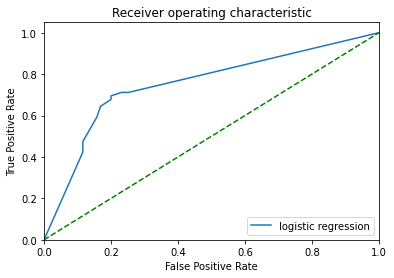

In [77]:
lra = roc_auc_score(f,g)
fpr,tpr,t = roc_curve(f,dtm.predict_proba(d)[:,1])

plt.plot(fpr,tpr,label='logistic regression'%lra)
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

3 : Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(a,s)
g=rf.predict(d)

In [83]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,t = roc_curve(f,g)
roc_auc = auc(fpr,tpr)
roc_auc

0.715343443354148

In [87]:
ne=[1,2,4,8,16,32,64,100,200]
tr=[]
te=[]
for e in ne:
    rf=RandomForestClassifier(n_estimators=e,n_jobs=-1)
    rf.fit(a,s)
    h=rf.predict(a)
    fpr,tpr,t = roc_curve(s,h)
    roc_auc=auc(fpr,tpr)
    tr.append(roc_auc)
    g=rf.predict(d)
    fpr,tpr,t=roc_curve(f,g)
    roc_auc=auc(fpr,tpr)
    te.append(roc_auc)

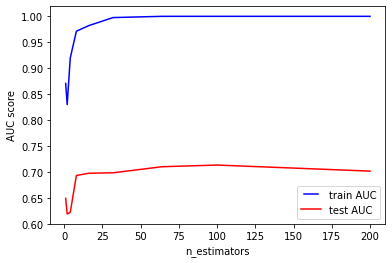

In [91]:
from matplotlib.legend_handler import HandlerLine2D
l1,=plt.plot(ne,tr,'b',label='train AUC')
l2,=plt.plot(ne,te,'r',label='test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend(handler_map={l1:HandlerLine2D(numpoints=2)})

In [92]:
rfm = RandomForestClassifier(n_estimators=60)
rfm.fit(a,s)
g=rfm.predict(d)

In [93]:
fpr,tpr,t=roc_curve(f,g)
roc_auc = auc(fpr,tpr)
roc_auc

0.6858162355040143

In [94]:
print(rfm.score(a,s))
print(rfm.score(d,f))

1.0
0.7272727272727273


In [95]:
confusion_matrix(f,g)

array([[82, 13],
       [29, 30]], dtype=int64)

In [96]:
classification_report(f,g)

'              precision    recall  f1-score   support\n\n           0       0.74      0.86      0.80        95\n           1       0.70      0.51      0.59        59\n\n    accuracy                           0.73       154\n   macro avg       0.72      0.69      0.69       154\nweighted avg       0.72      0.73      0.72       154\n'

In [97]:
print(precision_score(f,g))
print(recall_score(f,g))

0.6976744186046512
0.5084745762711864


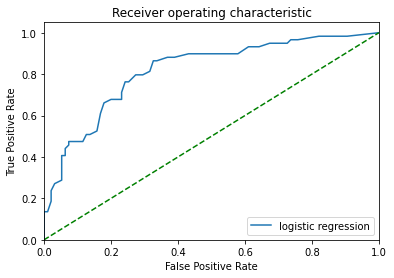

In [98]:
lra = roc_auc_score(f,g)
fpr,tpr,t = roc_curve(f,rfm.predict_proba(d)[:,1])

plt.plot(fpr,tpr,label='logistic regression'%lra)
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

4 : Support Vector Machine

In [99]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma='auto')
svm.fit(a,s)

SVC(gamma='auto')

In [100]:
print(svm.score(a,s))
print(svm.score(d,f))

1.0
0.6168831168831169


5 : KNN Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knc.fit(a,s)

KNeighborsClassifier(n_neighbors=7)

In [103]:
print(knc.score(a,s))
print(knc.score(d,f))

0.8045602605863192
0.7272727272727273


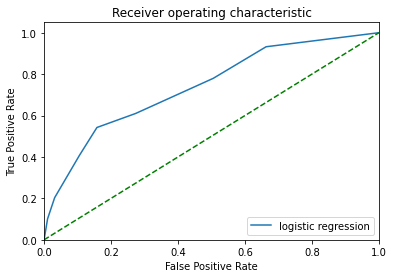

In [104]:
lra = roc_auc_score(f,g)
fpr,tpr,t = roc_curve(f,knc.predict_proba(d)[:,1])

plt.plot(fpr,tpr,label='logistic regression'%lra)
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

0.6262626262626263 0.7594058611097994 0.7617979869839728


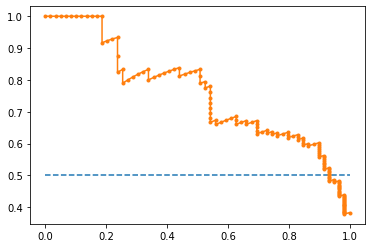

In [115]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

h=lm.predict_proba(d)
h=h[:,1]
g=lm.predict(d)
p,r,t=precision_recall_curve(f,h)
f1=f1_score(f,g)
auc=auc(r,p)
ap=average_precision_score(f,h)
print(f1,auc,ap)
plt.plot([0,1],[0.5,0.5],linestyle='--')
plt.plot(r,p,marker='.')

0.6037735849056605 0.660951426062298 0.6237938024056316


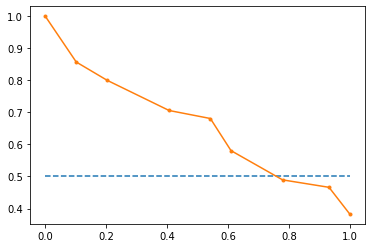

In [114]:
h=knc.predict_proba(d)
h=h[:,1]
g=knc.predict(d)
p,r,t=precision_recall_curve(f,h)
f1=f1_score(f,g)
auc=auc(r,p)
ap=average_precision_score(f,h)
print(f1,auc,ap)
plt.plot([0,1],[0.5,0.5],linestyle='--')
plt.plot(r,p,marker='.')

0.6725663716814159 0.7078955170542113 0.6054190868044078


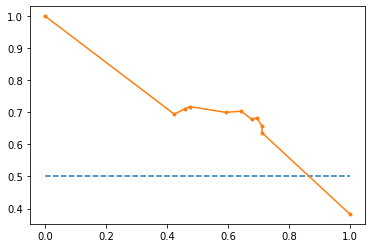

In [105]:
h=dtm.predict_proba(d)
h=h[:,1]
g=dtm.predict(d)
p,r,t=precision_recall_curve(f,h)
f1=f1_score(f,g)
auc=auc(r,p)
ap=average_precision_score(f,h)
print(f1,auc,ap)
plt.plot([0,1],[0.5,0.5],linestyle='--')
plt.plot(r,p,marker='.')

0.5882352941176471 0.7078955170542113 0.7419111171668198


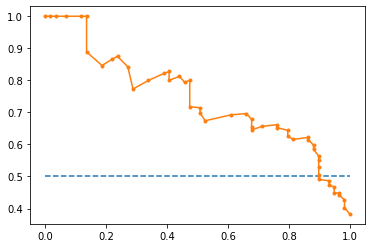

In [109]:
h=rfm.predict_proba(d)
h=h[:, 1]
g=rfm.predict(d)
p,r,t=precision_recall_curve(f,h)
f1=f1_score(f,g)
# auc=auc(r,p)
ap=average_precision_score(f,h)
print(f1,auc,ap)
plt.plot([0,1],[0.5,0.5],linestyle='--')
plt.plot(r,p,marker='.')

Random Forest is best performing
accuracy = 72%
precision = 0.70
recall = 0.51
auc = 